### Select the Right Threshold values using ROC Curve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('Usage.csv')
df.dropna(axis="rows",inplace=True)
df['Conf'] = df['Conf'].apply(abs)
df = df[df['Conf']<1]

In [4]:
df.drop('Unnamed: 0',axis="columns",inplace=True)

In [73]:
df.to_csv('analisi.csv',header=True)

In [5]:
# Extract the true labels and predicted probabilities
true_labels = df['Chair']
predicted_probs = df['Conf']

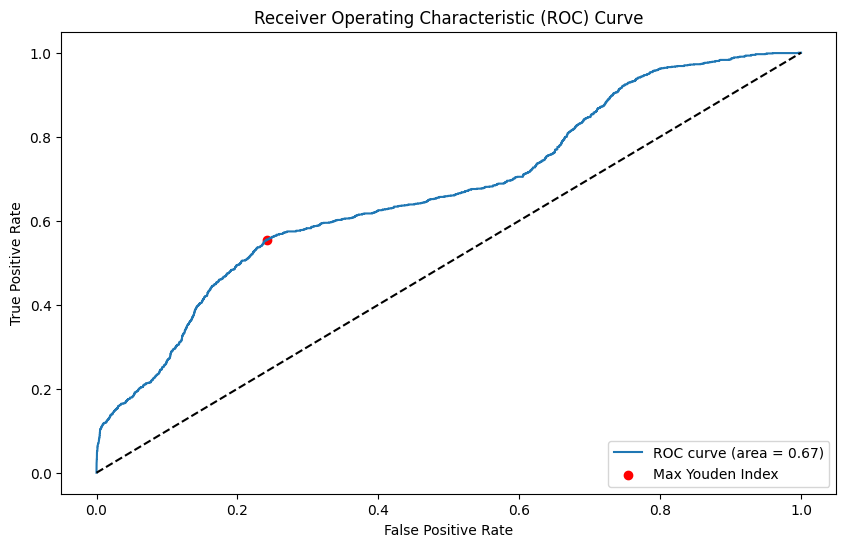

Max Youden Index: 0.31346523134841997
Threshold for Max Youden Index: 0.9895266


In [6]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)

# Compute the Youden index for each threshold
youden_index = tpr - fpr
max_youden_index = np.argmax(youden_index)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[max_youden_index], tpr[max_youden_index], color='red', label='Max Youden Index')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the Youden index and the corresponding threshold
print('Max Youden Index:', youden_index[max_youden_index])
print('Threshold for Max Youden Index:', thresholds[max_youden_index])

In [7]:
# Create a dataframe with the thresholds, Youden's indices, true positive rates, false positive rates, and accuracies
data = {
    'Threshold': thresholds,
    'Accuracy': (tpr * true_labels.sum() + (1 - fpr) * (len(true_labels) - true_labels.sum())) / len(true_labels),
    'Youden Index': youden_index,
    'True Positive Rate': tpr,
    'False Positive Rate': fpr
}

results_df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(results_df.iloc[2:20,:])

    Threshold  Accuracy  Youden Index  True Positive Rate  False Positive Rate
2    1.000000  0.866872      0.002568            0.002568             0.000000
3    1.000000  0.866987      0.003425            0.003425             0.000000
4    0.999999  0.867215      0.005137            0.005137             0.000000
5    0.999999  0.867787      0.010142            0.010274             0.000132
6    0.999999  0.868015      0.011854            0.011986             0.000132
7    0.999999  0.868358      0.014423            0.014555             0.000132
8    0.999999  0.868586      0.016135            0.016267             0.000132
9    0.999999  0.868701      0.016991            0.017123             0.000132
10   0.999998  0.869386      0.022128            0.022260             0.000132
11   0.999998  0.869501      0.022985            0.023116             0.000132
12   0.999998  0.869729      0.025421            0.025685             0.000264
13   0.999998  0.869843      0.026277            0.0

In [10]:
results_df[results_df['Youden Index'] == 0.31346523134841997]

,Threshold,Accuracy,Youden Index,True Positive Rate,False Positive Rate
960,0.989527,0.731459,0.313465,0.554795,0.241329


In [18]:
from sklearn.metrics import confusion_matrix

threshold = 0.9895266
# Apply the threshold to the 'Conf' column to make predictions
df['Predicted_Class'] = np.where(df['Conf'] >= threshold, df['Prediction'], 'not_' + df['Prediction'])
# Compute the confusion matrix for the class "chair"
y_true = df['Class'] == 'chair'
y_pred = df['Predicted_Class'] == 'chair'
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix for the class 'chair':")
print(cm)

Confusion Matrix for the class 'chair':
[[7254  329]
 [ 528  640]]


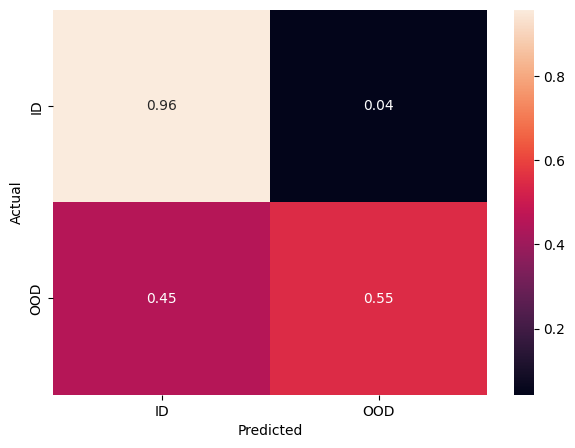

In [19]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["ID","OOD"], yticklabels=["ID","OOD"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import random

# Load the data
df = pd.read_csv('analisi (1).csv')

# Display the head of the dataframe
print(df.head())

# Randomly select a threshold
threshold = random.uniform(0, 1)
print("Randomly selected threshold:", threshold)

# Apply the threshold to the 'Conf' column to make predictions
df['Predicted_Class'] = np.where(df['Conf'] >= threshold, df['Prediction'], 'not_' + df['Prediction'])

# Compute the confusion matrix for the class "chair"
y_true = df['Class'] == 'chair'
y_pred = df['Predicted_Class'] == 'chair'
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix for the class 'chair':")
print(cm)

In [34]:
y_test = df.Chair.values
y_pred = df.Chair_bar.values
y_pred_proba = df['Conf'].values

In [35]:
#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
thresholds

array([1.9999999 , 0.9999999 , 0.99999976, ..., 0.12252948, 0.12251291,
       0.02178595])

In [39]:
from sklearn.metrics import accuracy_score
accuracy_ls = []

for thres in thresholds:
    y_pred = np.where(y_pred_proba>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
78,0.999976,0.875786
80,0.999975,0.875671
74,0.999977,0.875671
76,0.999976,0.875671
77,0.999976,0.875671


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

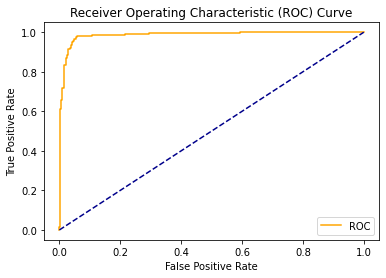

In [ ]:
plot_roc_curve(fpr,tpr)